# Experiments
link: https://docs.google.com/spreadsheets/d/1ATQJSiua4UExb08QPthAHpX9SjR8lj0hojvHwP6-V6Q/edit#gid=0


## 3.1.0) Separate rooms into train(train+valid) and test parts

In [1]:
# Train-Test split
import util
util.rooms_train_test_split("/home/igor/Desktop/tao/tisl/tisl_localization_22s/rooms_cleaned.txt", 400)

## 3.1.1) Build data.txt

In [2]:
# Build for Train & Valid
import util
util.build_dataset_train_valid(target_name='DEMO', \
                                pos_ind=0, feat_ind=1, base=0, method=0, \
                               ratio=5.0, threshold=100)

/home/igor/Desktop/tao/tisl/tisl_localization_22s/grakit.py:73: RuntimeWarning: invalid value encountered in double_scalars
  average_dis = np.sum(dis_matrix) / (num_v*(num_v - 1))


(8240, 1914)

In [3]:
# Build for Test
import util
patterns = [(x,y) for x in range(1,8) for y in range(0,3)]
for pattern in patterns:
    count = util.build_dataset_test(pattern=pattern, \
                                    pos_ind=0, feat_ind=1, base=0, method=0, \
                                    ratio=5.0, threshold=100)
    print('experiment {} with count {}'.format(pattern, count))

experiment (1, 0) with count 480
experiment (1, 1) with count 480
experiment (1, 2) with count 480
experiment (2, 0) with count 480
experiment (2, 1) with count 480
experiment (2, 2) with count 480
experiment (3, 0) with count 480
experiment (3, 1) with count 480
experiment (3, 2) with count 480
experiment (4, 0) with count 480
experiment (4, 1) with count 480
experiment (4, 2) with count 480
experiment (5, 0) with count 480
experiment (5, 1) with count 480
experiment (5, 2) with count 480
experiment (6, 0) with count 480
experiment (6, 1) with count 480
experiment (6, 2) with count 480
experiment (7, 0) with count 480
experiment (7, 1) with count 480
experiment (7, 2) with count 480


### Note: There are 10165 graphs in the input file, the first 8250 are for training, the last 1915 are for validation

In [4]:
!head -3 pytorch_DGCNN-master/data/DEMO/DEMO.txt
# !head -8 pytorch_DGCNN-master/data/DEMO_TEST/DEMO_TEST.txt

10154
13 0
1 12 1 2 3 4 5 6 7 8 9 10 11 12 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [5]:
!head -3 experiment_inputs/2_2.txt
# !head -8 pytorch_DGCNN-master/data/DEMO_TEST/DEMO_TEST.txt

480
4 0
1 3 1 2 3 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0


## 3.1.2) Visulize data.txt

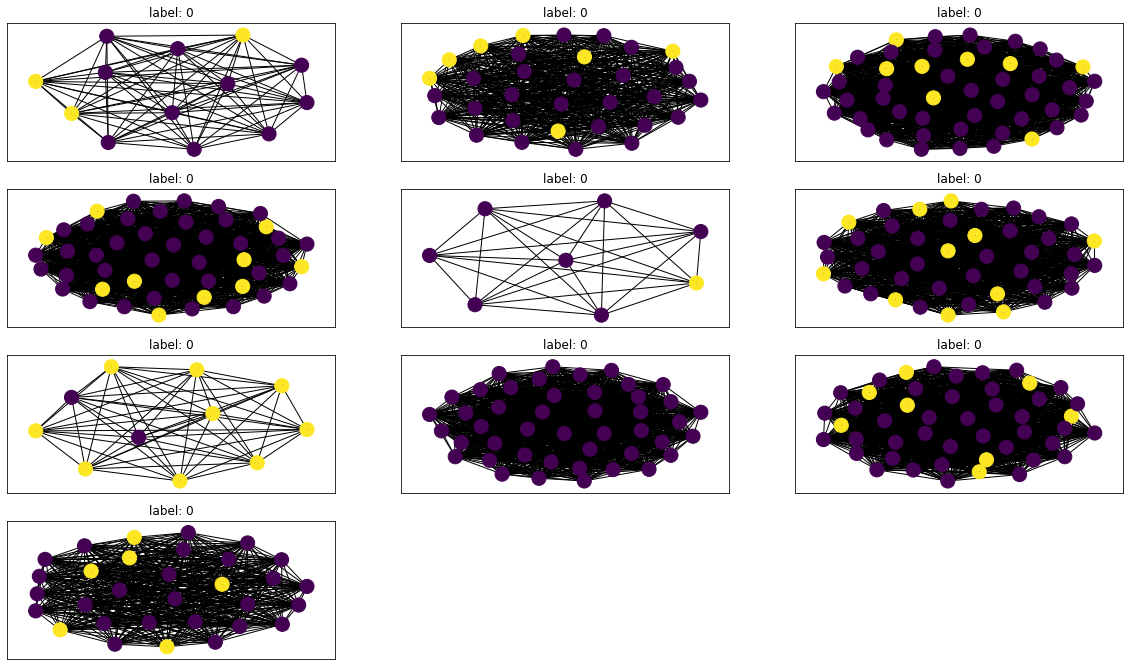

In [7]:
import util
util.visualize_graph(data="pytorch_DGCNN-master/data/DEMO/DEMO.txt", node_size=200, nth=1000, \
                     num_columns=3, figsize=(20,30), is_color_graph=True)

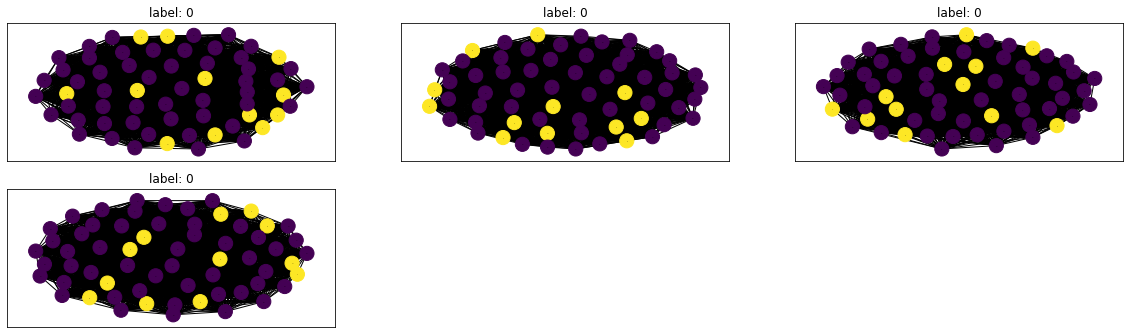

In [8]:
import util
util.visualize_graph(data="experiment_inputs/1_0.txt", node_size=200, nth=100, \
                     num_columns=3, figsize=(20,30), is_color_graph=True)

## 3.2) Build up train/valid split
### Note: we use: 
    folder 3 for train/valid split

In [9]:
# for Train & Valid
import util
util.build_train_valid_split_fold(3, 'DEMO', 8248, 1914)
!head -10 ./pytorch_DGCNN-master/data/DEMO/10fold_idx/test_idx-3.txt

8248
8249
8250
8251
8252
8253
8254
8255
8256
8257


## 3.3) Run DGCNN
    To actually run DGCNN, use VS code for better dynamic visibility
    To record the tuned hyper-parameters, use cells below
    To see the visualization of training process, open train_process.png

In [10]:
# Un-tuned: latent-dim, sortpooling_k, max_lv
# for Train & Valid
%cd pytorch_DGCNN-master
!pwd
# With feature
!CUDA_VISIBLE_DEVICES=0 python main_test.py       \
-seed 1       \
-data DEMO       \
-fold 3       \
-learning_rate 0.005      \
-num_epochs 50     \
-hidden 256       \
-latent_dim 64-32-32-16-8       \
-sortpooling_k 1       \
-out_dim 32       \
-batch_size 256       \
-gm DGCNN       \
-mode gpu       \
-dropout True       \
-test_number 1914 \
-extract_features True \
-max_lv 5 \
-visualize_process True

/home/igor/Desktop/tao/tisl/tisl_localization_22s/pytorch_DGCNN-master
/home/igor/Desktop/tao/tisl/tisl_localization_22s/pytorch_DGCNN-master
====== begin of gnn configuration ======
| msg_average = 0
======   end of gnn configuration ======
Namespace(batch_size=256, conv1d_activation='ReLU', data='DEMO', dropout=True, edge_feat_dim=0, extract_features=True, feat_dim=0, fold=3, gm='DGCNN', hidden=256, latent_dim=[64, 32, 32, 16, 8], learning_rate=0.005, max_lv=5, mode='gpu', num_class=0, num_epochs=50, out_dim=32, printAUC=False, seed=1, sortpooling_k=1.0, test_number=1914, visualize_process=True)
loading data
# classes: 397
# maximum node tag: 2
# train: 8240, # test: 1914
k used in SortPooling is: 100
Initializing DGCNN
loss: 5.73227 acc: 0.02344: 100%|████████████| 32/32 [00:02<00:00, 10.88batch/s]
average training of epoch 0: loss 5.86714 acc 0.01147 auc 0.00000
loss: 5.91898 acc: 0.04098: 100%|██████████████| 8/8 [00:00<00:00, 24.11batch/s]
average test of epoch 0: loss 5.99065 ac

loss: 1.47073 acc: 0.53516: 100%|████████████| 32/32 [00:02<00:00, 13.35batch/s]
average training of epoch 24: loss 1.53863 acc 0.53613 auc 0.00000
loss: 3.33987 acc: 0.29508: 100%|██████████████| 8/8 [00:00<00:00, 21.28batch/s]
average test of epoch 24: loss 3.70616 acc 0.29937 auc 0.00000
loss: 1.37547 acc: 0.58203: 100%|████████████| 32/32 [00:02<00:00, 13.19batch/s]
average training of epoch 25: loss 1.45869 acc 0.56311 auc 0.00000
loss: 3.48924 acc: 0.27869: 100%|██████████████| 8/8 [00:00<00:00, 19.67batch/s]
average test of epoch 25: loss 3.84318 acc 0.30721 auc 0.00000
loss: 1.44335 acc: 0.55078: 100%|████████████| 32/32 [00:02<00:00, 13.40batch/s]
average training of epoch 26: loss 1.43816 acc 0.56689 auc 0.00000
loss: 3.55937 acc: 0.30328: 100%|██████████████| 8/8 [00:00<00:00, 22.10batch/s]
average test of epoch 26: loss 3.69724 acc 0.34222 auc 0.00000
loss: 1.43051 acc: 0.59766: 100%|████████████| 32/32 [00:02<00:00, 13.62batch/s]
average training of epoch 27: loss 1.45715 

loading test data: 6_2.txt
loading test data: 3_1.txt
loading test data: 4_2.txt
loading test data: 5_2.txt
loading test data: 2_0.txt
loading test data: 4_0.txt
loading test data: 6_0.txt
loading test data: 5_1.txt
loading test data: 7_1.txt
loading test data: 5_0.txt
loading test data: 7_2.txt
loading test data: 1_2.txt
loading test data: 1_0.txt
loading test data: 4_1.txt
loading test data: 1_1.txt
loading test data: 6_1.txt


## 3.4) Get top-1 & top-5 scores

In [11]:
from top_n import get_top_n_score
import os
from os.path import join
test_set_list = os.listdir('/home/igor/Desktop/tao/tisl/tisl_localization_22s/experiment_sets')

for test_set in test_set_list:  
    top1_score_test1, top5_score_test1 = get_top_n_score(5, join('/home/igor/Desktop/tao/tisl/tisl_localization_22s/experiment_sets', test_set))
    print('Top-1 score for {}: {}'.format(test_set, top1_score_test1))
    print('Top-5 score for {}: {}'.format(test_set, top5_score_test1))

Top-1 score for 3_2.txt: 0.42083333333333334
Top-5 score for 3_2.txt: 0.7270833333333333
Top-1 score for 2_1.txt: 0.1625
Top-5 score for 2_1.txt: 0.40208333333333335
Top-1 score for 3_0.txt: 0.45
Top-5 score for 3_0.txt: 0.7229166666666667
Top-1 score for 2_2.txt: 0.23333333333333334
Top-5 score for 2_2.txt: 0.5145833333333333
Top-1 score for 7_0.txt: 0.6583333333333333
Top-5 score for 7_0.txt: 0.78125
Top-1 score for 6_2.txt: 0.7895833333333333
Top-5 score for 6_2.txt: 0.8708333333333333
Top-1 score for 3_1.txt: 0.28541666666666665
Top-5 score for 3_1.txt: 0.5729166666666666
Top-1 score for 4_2.txt: 0.64375
Top-5 score for 4_2.txt: 0.8
Top-1 score for 5_2.txt: 0.7604166666666666
Top-5 score for 5_2.txt: 0.8729166666666667
Top-1 score for 2_0.txt: 0.225
Top-5 score for 2_0.txt: 0.5458333333333333
Top-1 score for 4_0.txt: 0.5729166666666666
Top-5 score for 4_0.txt: 0.7875
Top-1 score for 6_0.txt: 0.6770833333333334
Top-5 score for 6_0.txt: 0.8395833333333333
Top-1 score for 5_1.txt: 0.4

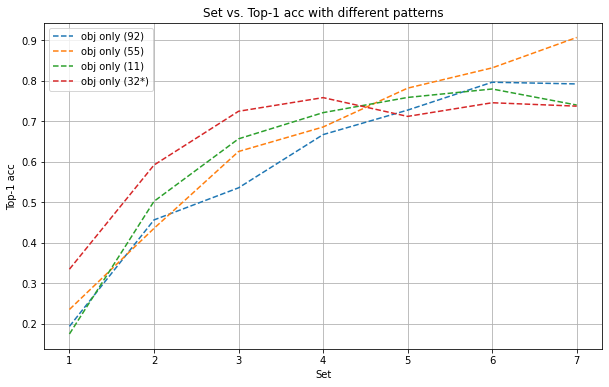

In [12]:
import matplotlib.pyplot as plt
import numpy as np
  
x = np.array([1, 2, 3, 4, 5, 6, 7])
y_0 = np.array([0.2416666667,0.4583333333,0.54375,0.6541666667,0.6645833333,0.6916666667,0.6666666667])
y_1 = np.array([0.1541666667,0.2833333333,0.3604166667,0.4666666667,0.4770833333,0.4833333333,0.5625])
y_2_0 = np.array([0.19375,0.45625,0.5354166667,0.6666666667,0.7270833333,0.7958333333,0.7916666667])
y_2_1 = np.array([0.2354166667,0.4354166667,0.625,0.6854166667,0.78125,0.83125,0.90625])
y_2_2 = np.array([0.175,0.5020833333,0.65625,0.7208333333,0.7583333333,0.7791666667,0.7395833333])
y_2_3 = np.array([0.3347368421,0.5915789474,0.7242105263,0.7578947368,0.7115789474,0.7452631579,0.7368421053])

# first plot with X and Y data
# plt.subplot(num_rows, num_columns, i)
plt.figure(figsize=(10, 6))
# plt.plot(x, y_0, label='frame+obj', linestyle="-")
# plt.plot(x, y_1, label='frame only', linestyle=":")
plt.plot(x, y_2_0, label='obj only (92)', linestyle="--")
plt.plot(x, y_2_1, label='obj only (55)', linestyle="--")
plt.plot(x, y_2_2, label='obj only (11)', linestyle="--")
plt.plot(x, y_2_3, label='obj only (32*)', linestyle="--")
  
plt.xlabel("Set")
plt.ylabel("Top-1 acc")
plt.title('Set vs. Top-1 acc with different patterns')
plt.legend()
plt.grid(True)
plt.show()

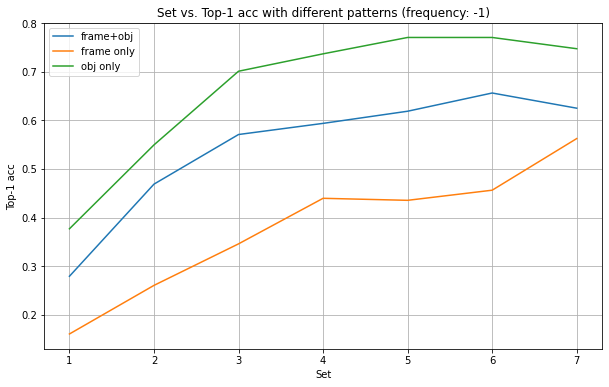

In [13]:
# -1
import matplotlib.pyplot as plt
import numpy as np
  
x = np.array([1, 2, 3, 4, 5, 6, 7])
y_0 = np.array([
0.2791666667,
0.46875,
0.5708333333,
0.59375,
0.61875,
0.65625,
0.625])
y_1 = np.array([
0.1604166667,
0.2604166667,
0.3458333333,
0.4395833333,
0.4354166667,
0.45625,
0.5625])
y_2 = np.array([
0.3768421053,
0.5494736842,
0.7010526316,
0.7368421053,
0.7705263158,
0.7705263158,
0.7473684211])
# first plot with X and Y data
# plt.subplot(num_rows, num_columns, i)
plt.figure(figsize=(10, 6))
plt.plot(x, y_0, label='frame+obj', linestyle="-")
plt.plot(x, y_1, label='frame only', linestyle="-")
plt.plot(x, y_2, label='obj only', linestyle="-")
  
plt.xlabel("Set")
plt.ylabel("Top-1 acc")
plt.title('Set vs. Top-1 acc with different patterns (frequency: -1)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
import util
util.get_object_info_json()
path = join(data_path, scan, 'semseg.v2.json')
        num_class, obj_info = get_object_info_json(path, threshold)

IndentationError: unexpected indent (2895482729.py, line 4)